<a href="https://colab.research.google.com/github/pstavrakoglou/SAP/blob/main/Sentiment_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilities :
import re # regular expression library
import numpy as np
import pandas as pd

# plotting :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk :
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import StackingClassifier

# time library :
import time

In [ ]:
# Importing the dataset :
from google.colab import drive
drive.mount('/content/drive')
#DATASET_COLUMNS=['Polarity','ids','date','flag','user','Tweet']
#DATASET_ENCODING = "ISO-8859-1"
#df = pd.read_csv('/content/drive/MyDrive/pythonProject2/pythonProject2/tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display of the first 5 lines :
#df = df.sample(10000)

Mounted at /content/drive


**Twitter US Airline Sentiment**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/pythonProject2/pythonProject2/twitterusairlinesentiment.csv', encoding="ISO-8859-1", names = ['Polarity', 'Tweet'] , header = 0)

In [ ]:
# Replacing string with integer values
df1['Polarity'] = df1['Polarity'].str.lower().str.strip()
df1['Polarity'] = df1['Polarity'].replace('positive', 1)
df1['Polarity'] = df1['Polarity'].replace('negative', 0)
data = df1[['Tweet','Polarity']]
# Separating positive and negative tweets :
data_pos = data[data['Polarity'] == 0]
data_neg = data[data['Polarity'] == 1]
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])
print(df1.head())

   Polarity                                              Tweet
0         1  @VirginAmerica plus you've added commercials t...
1         0  @VirginAmerica it's really aggressive to blast...
2         0  @VirginAmerica and it's a really big bad thing...
3         0  @VirginAmerica seriously would pay $30 a fligh...
4         1  @VirginAmerica yes, nearly every time I fly VX...


In [ ]:
print(dataset)

                                                   Tweet  Polarity
1      @VirginAmerica it's really aggressive to blast...         0
2      @VirginAmerica and it's a really big bad thing...         0
3      @VirginAmerica seriously would pay $30 a fligh...         0
11         @VirginAmerica SFO-PDX schedule is still MIA.         0
13     @VirginAmerica  I flew from NYC to SFO last we...         0
...                                                  ...       ...
11527  @AmericanAir Love the new planes for the JFK-L...         1
11529  @AmericanAir Flight 236 was great. Fantastic c...         1
11532  Thank you. â@AmericanAir: @jlhalldc Customer...         1
11534                        @AmericanAir Thanks! He is.         1
11538  @AmericanAir thank you we got on a different f...         1

[11541 rows x 2 columns]


**IMDB Review Dataset**

In [ ]:
# Read saved sample
df = pd.read_csv('/content/drive/MyDrive/pythonProject2/pythonProject2/imdbreviewdatasetsample1.csv', encoding="utf-8")

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/pythonProject2/pythonProject2/IMDB Dataset.csv', encoding="utf-8", names=['Text','Polarity'],)

In [ ]:
# IMDB Review dataset
# Replacing string with integer values
#df['Polarity'] = df['Polarity'].str.lower().str.strip()
df['Polarity'] = df['Polarity'].replace('positive', 1)
df['Polarity'] = df['Polarity'].replace('negative', 0)

# Print unique values in the 'Polarity' column
print(df['Polarity'].unique())


[0 1]


In [ ]:
print(df)

      Unnamed: 0                                              Tweet  Polarity
0          32868  Ronald Colman won a Best Actor Oscar for showy...         0
1          47752  Someone, some day, should do a study of archit...         0
2           7993  My main criticism with the movie is the animat...         0
3          45258  I went to see this film at the cinemas and i w...         0
4          23756  I can't really remember any details of this mo...         0
...          ...                                                ...       ...
9995       48517  I can't add much to what has been said already...         1
9996       15807  Spoilers I loved the later episodes from colle...         1
9997       14228  In the movie, "The Falcon and the Snowman", wh...         1
9998       40138  Las Vegas is very funny and focuses on the sub...         1
9999       20314  This stylistically sophisticated visual game p...         1

[10000 rows x 3 columns]


In [ ]:
class_0 = df[df['Polarity'] == 0]
class_1 = df[df['Polarity'] == 1]
class_0_sample_size = 5000
class_1_sample_size = 5000
# Sample instances from each class
class_0_sample = class_0.sample(class_0_sample_size)
class_1_sample = class_1.sample(class_1_sample_size)
df = pd.concat([class_0_sample, class_1_sample])

**Save IMDB Review Dataset to Google Drive**

In [ ]:
df.to_csv('/content/drive/MyDrive/pythonProject2/pythonProject2/imdbreviewdatasetsample1.csv', encoding="utf-8")

In [ ]:
df.rename(columns={"Text": "Tweet"},inplace=True)

In [ ]:
# Separating positive and negative tweets :
data_pos = data[data['Polarity'] == 0]
data_neg = data[data['Polarity'] == 1]
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])

In [ ]:
data = df[['Tweet','Polarity']]

**Sentiment140 dataset Preprocessing**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pythonProject2/pythonProject2/sentiment140sample1.csv', encoding="ISO-8859-1")

In [ ]:
# Display the column names of our dataset :
df.columns

In [ ]:
# Display the number of records is our dataset :
print('length of data is', len(df))

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
# Checking for Null values :
np.sum(df.isnull().any(axis=1))

In [ ]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

In [ ]:
# Checking unique Target Values :
df['Polarity'].unique()

array([0, 1])

In [ ]:
df['Polarity'].nunique()

In [ ]:
# Check if any rows contain the value 'Polarity' in the 'Polarity' column
has_polarity = (df['Polarity'] == 'Polarity').any()

print(has_polarity)

False


In [ ]:
df.loc[df['Polarity'] == 'Polarity']

In [ ]:
df1.groupby('Polarity').count()

,Tweet
Polarity,
0,9178
1,2363


<Axes: xlabel='Polarity', ylabel='count'>

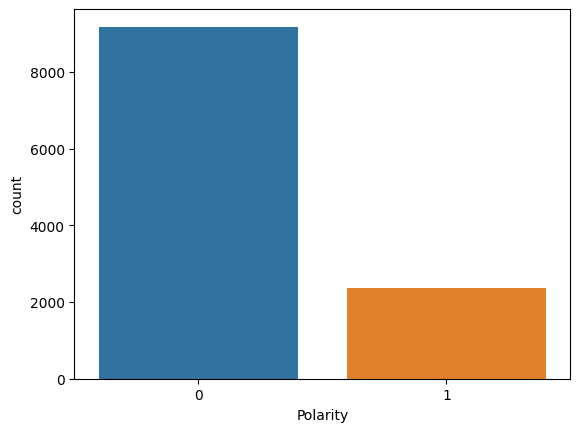

In [ ]:
import seaborn as sns
sns.countplot(x='Polarity', data=df1)

In [ ]:
# Selecting the text and Target column for our further analysis :
data = df[['Polarity','Tweet']]

In [ ]:
# Replacing the values to ease understanding :
data['Polarity'] = data['Polarity'].replace(4,1)

<ipython-input-8-f8eb690f0aab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity'] = data['Polarity'].replace(4,1)


In [ ]:
# Print unique values of target variable :
data['Polarity'].unique()

array([0, 1])

In [ ]:
# Separating positive and negative tweets :
data_pos = data[data['Polarity'] == 0]
data_neg = data[data['Polarity'] == 1]

In [ ]:
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])

In [ ]:
print(dataset)

                                                  Tweet  Polarity
0     Ronald Colman won a Best Actor Oscar for showy...         0
1     Someone, some day, should do a study of archit...         0
2     My main criticism with the movie is the animat...         0
3     I went to see this film at the cinemas and i w...         0
4     I can't really remember any details of this mo...         0
...                                                 ...       ...
9995  I can't add much to what has been said already...         1
9996  Spoilers I loved the later episodes from colle...         1
9997  In the movie, "The Falcon and the Snowman", wh...         1
9998  Las Vegas is very funny and focuses on the sub...         1
9999  This stylistically sophisticated visual game p...         1

[10000 rows x 2 columns]


In [ ]:
# Quick view of how our data looks:
print(dataset['Tweet'].tail())

9995                                     Mmm iced coffee 
9996                                  Ohh, there it goes 
9997    oh yea, charlie bartlett was in star trek as c...
9998    @BrodyJenner Men R spoiled by women, that's Y ...
9999    Watching CSI: NY  Grabbing something to eat so...
Name: Tweet, dtype: object


In [ ]:
# Making statement text in lower case :
dataset['Tweet'] = dataset['Tweet'].str.lower()
dataset['Tweet'].tail()

9995                                     mmm iced coffee 
9996                                  ohh, there it goes 
9997    oh yea, charlie bartlett was in star trek as c...
9998    @brodyjenner men r spoiled by women, that's y ...
9999    watching csi: ny  grabbing something to eat so...
Name: Tweet, dtype: object

In [ ]:
# Defining set containing all stopwords in English :
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']


In [ ]:
# Replace UTF-8 BOM with "?"
def replace_bom(text: str) -> str:
    text = re.sub(r'\ufeff', '?', text, count=1, flags=re.IGNORECASE)
    return text

dataset['Tweet'] = dataset['Tweet'].apply(lambda text: replace_bom(text))
dataset['Tweet'].head()

0    @larylittle i know  i don't think i can get up...
1      so sleepy! boyfriend's leaving for the weekend 
2                                    english homework 
3    i really need to get a car - sick of having to...
4    class tomm...don't wanna go bc i can't talk to...
Name: Tweet, dtype: object

In [ ]:
# remove hashtags and mentions
def remove_hashtags_mentions(text: str) -> str:
    text = re.sub("@[A-Za-z0-9_]+", "", text)
    text = re.sub("#[A-Za-z0-9_]+", "", text)
    return text
dataset['Tweet'] = dataset['Tweet'].apply(lambda text: remove_hashtags_mentions(text))
dataset['Tweet'].head()

0     i know  i don't think i can get up that early...
1      so sleepy! boyfriend's leaving for the weekend 
2                                    english homework 
3    i really need to get a car - sick of having to...
4    class tomm...don't wanna go bc i can't talk to...
Name: Tweet, dtype: object

In [ ]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


dataset['Tweet'] = dataset['Tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['Tweet'].head()

0                  know don't think get early oh well.
1                  sleepy! boyfriend's leaving weekend
2                                     english homework
3       really need get car - sick exercise get places
4    class tomm...don't wanna go bc can't talk some...
Name: Tweet, dtype: object

In [ ]:
#  Cleaning and removing punctuations :
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['Tweet'].tail()

9995                                      mmm iced coffee
9996                                             ohh goes
9997    oh yea charlie bartlett star trek chekhov haha...
9998    men r spoiled women thats many r worthless ent...
9999          watching csi ny grabbing something eat soon
Name: Tweet, dtype: object

In [ ]:
# Cleaning and removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)


dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['Tweet'].tail()

9995                                      mmm iced coffee
9996                                             ohh goes
9997    oh yea charlie bartlett star trek chekhov haha...
9998    men r spoiled women thats many r worthless ent...
9999          watching csi ny grabbing something eat soon
Name: Tweet, dtype: object

In [ ]:
# Cleaning and removing URL’s :
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)


dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_URLs(x))
dataset['Tweet'].tail()

9995                                      mmm iced coffee
9996                                             ohh goes
9997    oh yea charlie bartlett star trek chekhov haha...
9998    men r spoiled women thats many r worthless ent...
9999          watching csi ny grabbing something eat soon
Name: Tweet, dtype: object

In [ ]:
# Cleaning and removing Numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_numbers(x))
dataset['Tweet'].tail()

9995                                      mmm iced coffee
9996                                             ohh goes
9997    oh yea charlie bartlett star trek chekhov haha...
9998    men r spoiled women thats many r worthless ent...
9999          watching csi ny grabbing something eat soon
Name: Tweet, dtype: object

In [ ]:
nltk.download('punkt')
# Getting tokenization of tweet text :
from nltk.tokenize import word_tokenize

dataset['Tweet'] = dataset['Tweet'].apply(word_tokenize)
dataset['Tweet'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0            [know, dont, think, get, early, oh, well]
1               [sleepy, boyfriends, leaving, weekend]
2                                  [english, homework]
3    [really, need, get, car, sick, exercise, get, ...
4    [class, tommdont, wan, na, go, bc, cant, talk,...
Name: Tweet, dtype: object

In [ ]:
# Applying Stemming :
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: stemming_on_text(x))
dataset['Tweet'].head()

0            [know, dont, think, get, early, oh, well]
1               [sleepy, boyfriends, leaving, weekend]
2                                  [english, homework]
3    [really, need, get, car, sick, exercise, get, ...
4    [class, tommdont, wan, na, go, bc, cant, talk,...
Name: Tweet, dtype: object

In [ ]:
nltk.download('wordnet')
# Applying Lemmatizer :
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['Tweet'] = dataset['Tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['Tweet'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0            [know, dont, think, get, early, oh, well]
1               [sleepy, boyfriends, leaving, weekend]
2                                  [english, homework]
3    [really, need, get, car, sick, exercise, get, ...
4    [class, tommdont, wan, na, go, bc, cant, talk,...
Name: Tweet, dtype: object

In [ ]:
# Separating input feature and label :
X = data.Tweet
y = data.Polarity

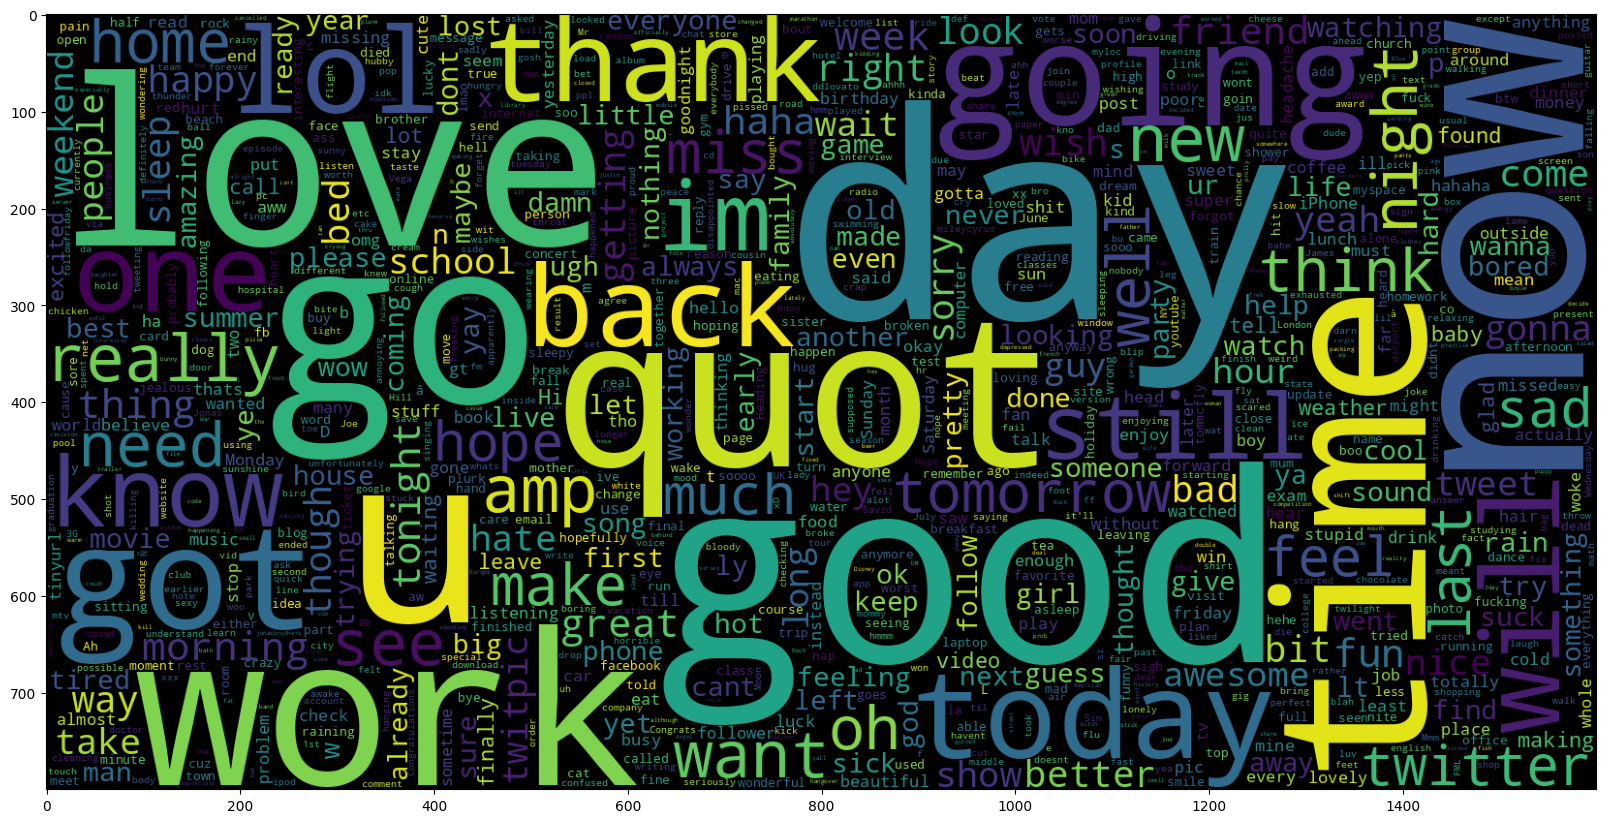

In [ ]:
# Plot a cloud of words for negative tweets :
data_neg = data['Tweet'] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

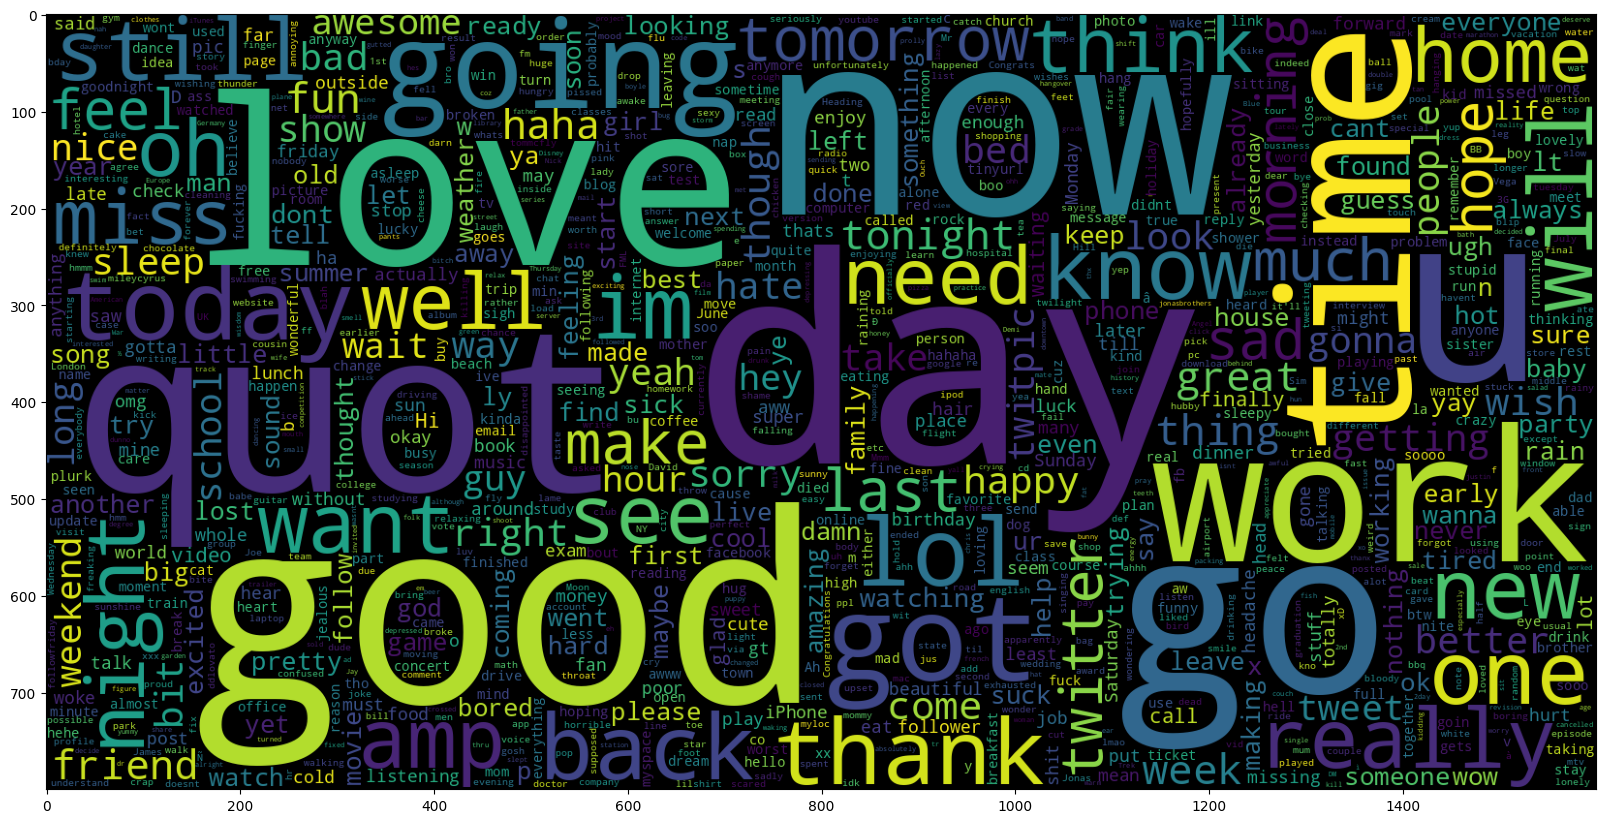

In [ ]:
# Plot a cloud of words for positive tweets :
data_pos = data['Tweet'] # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  10000


In [ ]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
#X_test

In [ ]:
# Do SVD Dimensionality reduction to ease processing.
from sklearn.decomposition import TruncatedSVD
n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train = svd.fit_transform(X_train)
#X_test = svd.fit_transform(X_test)
X_test = svd.transform(X_test)


In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
# Applying class weights

unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_weights = dict(zip(unique_classes, class_counts.max() / class_counts))
#class_priors = [class_weights.get(cls, 1.0) for cls in unique_classes]
class_priors = class_counts / np.sum(class_counts)

In [ ]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB(class_prior = class_priors)
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
#model_Evaluate(BNBmodel)
#y_pred1 = BNBmodel.predict(X_test)
threshold = 0.25
y_pred_prob = BNBmodel.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)  # Adjusted predictions
print(f'Accuracy score for Bernoulli NB is  {100 * round(metrics.accuracy_score(y_pred_adjusted, y_test), 3)} %')
print(f'F1 score for Bernoulli NB is  {metrics.f1_score(y_pred_adjusted, y_test), 3}%')

The execution time of this model is 0.07 seconds

Accuracy score for Bernoulli NB is  82.5 %
F1 score for Bernoulli NB is  (0.6195488721804512, 3)%


In [ ]:
print(accuracy_score(y_pred1,y_test))

0.7432


In [ ]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC(class_weight = class_weights)
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
#model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
print(f'Accuracy score for SVM is  {100 * round(metrics.accuracy_score(y_pred2, y_test), 3)} %')
print(f'F1 score for SVM is  {metrics.f1_score(y_pred2, y_test)}')

The execution time of this model is 1.16 seconds

Accuracy score for SVM is  88.0 %
F1 score for SVM is  0.7361216730038023


In [ ]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1 , class_weight = class_weights)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
#model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
print(f'Accuracy score for Logistic Regression is {100 * round(metrics.accuracy_score(y_pred3, y_test), 3)} %')
print(f'F1 score for Logistic Regression  {metrics.f1_score(y_pred3, y_test)}')

The execution time of this model is 1.25 seconds

Accuracy score for Logistic Regression is 88.1 %
F1 score for Logistic Regression  0.7379679144385026


In [ ]:
# Model 4 LGBM
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the classifier
clf = LGBMClassifier(learning_rate = 0.1, max_depth = 15, n_estimators =  200, num_leaves = 20 , class_weight = class_weights)

# Train the classifier with the best hyperparameters
clf.fit(X_train, y_train)

# Make predictions with the best classifier
y_pred4 = clf.predict(X_test)

print(f'Accuracy score for LGBM is {100 * round(metrics.accuracy_score(y_pred4, y_test), 3)} %')
print(f'F1 score for LGBM is  {metrics.f1_score(y_pred4, y_test)}')

[LightGBM] [Info] Number of positive: 1800, number of negative: 6855
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 8655, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy score for LGBM is 89.8 %
F1 score for LGBM is  0.738898756660746


In [ ]:
# Model 5  Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier(class_weight = class_weights)
rf.fit(X_train, y_train)

y_pred5 = rf.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred5)

print(f'Accuracy score for Random Forest is {100 * round(metrics.accuracy_score(y_pred5, y_test), 3)} %')
print(f'F1 score for Random Forest  is {metrics.f1_score(y_pred5, y_test)}')

Accuracy score for Random Forest is 87.8 %
F1 score for Random Forest  is 0.5894736842105263


In [ ]:
print(accuracy_score(y_pred5, y_test))

0.7244


In [ ]:
# Model 6 XGBoost
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# Applying class weights to XGBoost
#lmodel = xgb.XGBClassifier()
positive_class_count = np.sum(y_train == 1)
negative_class_count = np.sum(y_train == 0)
class_weight_ratio = positive_class_count / negative_class_count

# Define the XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': class_weight_ratio,  # Set the scale_pos_weight parameter
    # Add other XGBoost parameters here
}

# Create DMatrix objects for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
xgb_model = xgb.train(xgb_params, dtrain)

# Make predictions
y_pred6 = (xgb_model.predict(dtest) > 0.1).astype(int)
# Perform cross-validation
#scores = cross_val_score(lmodel, X_train, y_train, cv=5)  # Change cv value as desired

# Print the cross-validation scores
#print("Cross-validation scores:", scores)
#print("Mean cross-validation score:", scores.mean())

# Train the model on the full training set
#lmodel.fit(X_train, y_train)

# Evaluate on the test set
#y_pred6 = lmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_pred6, y_test)
print(f'Accuracy score for XGBoost is {100 * round(accuracy, 3)} %')
print(f'F1 score for XGBoost  {metrics.f1_score(y_pred6, y_test)}')

Accuracy score for XGBoost is 85.0 %
F1 score for XGBoost  0.6521739130434783


In [ ]:
# Model 7 C4.5
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42 , class_weight = class_weights)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred7 = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred7)
print(f'Accuracy score for C4.5 is {100 * round(accuracy, 3)} %')
print(f'F1 score for C4.5  {metrics.f1_score(y_pred7, y_test)}')

Accuracy score for C4.5 is 83.7 %
F1 score for C4.5  0.5872042068361086


In [ ]:
# Model 8 Knn
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Choose a range of k values to evaluate
#k_values = range(1, 21)

# Initialize lists to store cross-validation scores
#cv_scores = []

# Iterate over k values
#for k in k_values:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    #cv_scores.append(scores.mean())

# Find the best k value
#best_k = k_values[cv_scores.index(max(cv_scores))]

# Print the best k value
#print("Best k:", best_k)

# Calculate sample weights based on class weights
sample_weights = np.array([class_weights[y] for y in y_train])

# Create a KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=19)

# Train the model on the training data
best_knn.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test data
y_pred8 = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred8)
print(f'Accuracy score for Knn is {100 * round(accuracy, 3)} %')
print(f'F1 score for Knn  {metrics.f1_score(y_pred8, y_test)}')


Accuracy score for Knn is 88.4 %
F1 score for Knn  0.6402569593147751


Stacking classifiers

4 best : T1,T2,T3,T4 (stack) with meta classifier: T1,T2,T3,T4,T5,T6,T7,T8 individually

So 8 tests with the same stack (base classifiers)


1.   T1,T2,T3,T4   meta:T1
2.   T1,T2,T3,T4   meta:T2
3.   T1,T2,T3,T4   meta:T3
4.   T1,T2,T3,T4   meta:T4
5.   T1,T2,T3,T4   meta:T5
6.   T1,T2,T3,T4   meta:T6
7.   T1,T2,T3,T4   meta:T7
8.   T1,T2,T3,T4   meta:T8








In [ ]:
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
base_classifiers = [
    ('svm', xgb.XGBClassifier()),
    ('lr', RandomForestClassifier()),
    ('bnb', KNeighborsClassifier(n_neighbors=19)),
    ('lgbm',  DecisionTreeClassifier(criterion='entropy', random_state=42))]

sclf = StackingClassifier(estimators= base_classifiers, final_estimator  = DecisionTreeClassifier(criterion='entropy', random_state=42))
sclf.fit(X_train,y_train)
stacked_clf = sclf.predict(X_test)

print ("Accuracy for Stacking 1 :" + str(accuracy_score(y_test, stacked_clf)))

Accuracy for Stacking 1 :0.7548


 5th , 6th , 7th and 8th best : T5,T6,T7,T8 (stack) with meta classifiers: T1,T2,T3,T4,T5,T6,T7,T8 individually

So 8 tests with the same stack (base classifiers)


1.   T5,T6,T7,T8  meta:T1
2.   T5,T6,T7,T8  meta:T2
3.   T5,T6,T7,T8  meta:T3
4.   T5,T6,T7,T8  meta:T4
5.   T5,T6,T7,T8  meta:T5
6.   T5,T6,T7,T8  meta:T6
7.   T5,T6,T7,T8  meta:T7
8.   T5,T6,T7,T8  meta:T8

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
base_classifiers = [
    ('lgbm', LGBMClassifier(learning_rate = 0.1, max_depth = 15, n_estimators =  200, num_leaves = 20)),
    ('randforest', RandomForestClassifier()),
    ('xgb', xgb.XGBClassifier())]
sclf = StackingClassifier(estimators= base_classifiers, final_estimator = KNeighborsClassifier(n_neighbors=19))
sclf.fit(X_train,y_train)
stacked_clf = sclf.predict(X_test)

print ("Accuracy for Stacking 1 :" + str(accuracy_score(y_test, stacked_clf)))

KeyboardInterrupt: ignored

**Majority Voting Implementation**

Use the first 4 classifiers

In [ ]:
# Majority Voting

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load and preprocess your dataset
# X_train, X_test, y_train, y_test = ...

# Define the base classifiers with tuned hyperparameters
# Using first 4
svm = LinearSVC()
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
bnb = BernoulliNB()
lgbm = LGBMClassifier(learning_rate = 0.1, max_depth = 15, n_estimators =  200, num_leaves = 20)

# Using second best (last 4)

rf = RandomForestClassifier()
xgbc = xgb.XGBClassifier()
c45 = DecisionTreeClassifier(criterion='entropy', random_state=42)
knn = KNeighborsClassifier(n_neighbors=19)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', xgbc), ('rf', rf), ('knn', knn), ('c45', c45)],
    voting='hard'  # 'hard' for majority voting
)

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
voting_pred = voting_clf.predict(X_test)

# Calculate and print the accuracy score for the Voting Classifier
accuracy = accuracy_score(y_test, voting_pred)
print("Accuracy for Majority Voting:", accuracy)

Accuracy for Majority Voting: 0.792


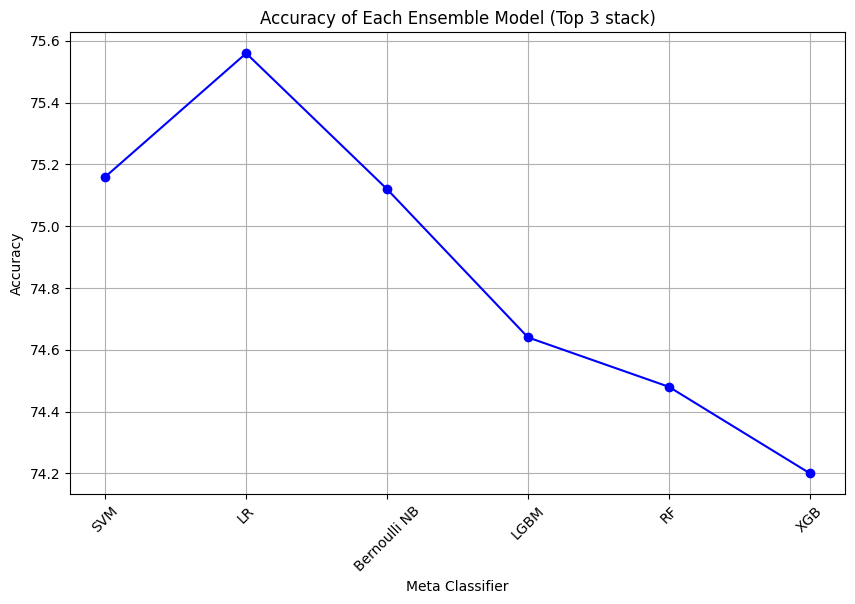

In [ ]:
import matplotlib.pyplot as plt

# Ensemble accuracies
ensemble_accuracies = [75.16, 75.56, 75.12, 74.64, 74.48, 74.2]

# Meta classifier labels
meta_classifiers = ['SVM', 'LR', 'Bernoulli NB', 'LGBM', 'RF' , 'XGB']

# Plotting the ensemble accuracies
plt.figure(figsize=(10, 6))
plt.plot(meta_classifiers, ensemble_accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Meta Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Ensemble Model (Top 3 stack)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

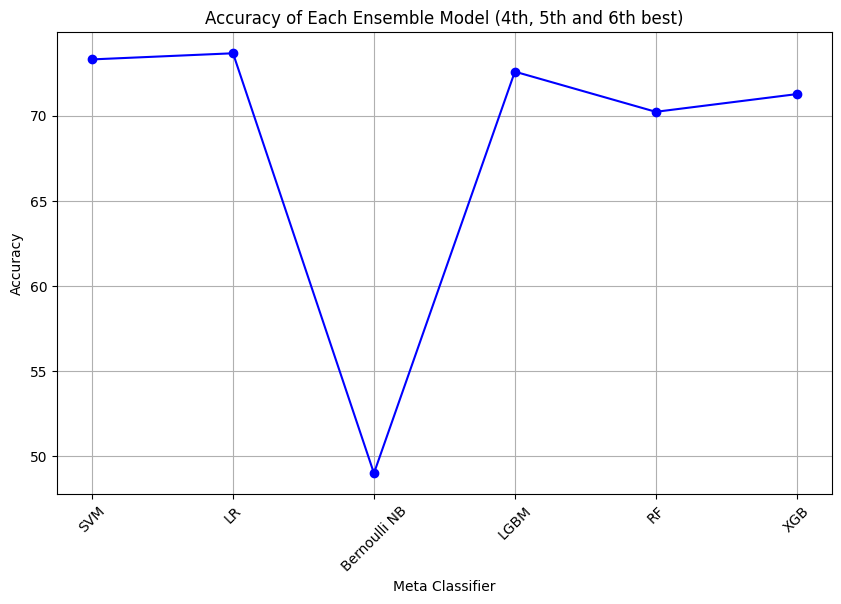

In [ ]:
import matplotlib.pyplot as plt

# Ensemble accuracies
ensemble_accuracies = [73.32, 73.68, 49, 72.6, 70.24, 71.28]

# Meta classifier labels
meta_classifiers = ['SVM', 'LR', 'Bernoulli NB', 'LGBM', 'RF' , 'XGB']

# Plotting the ensemble accuracies
plt.figure(figsize=(10, 6))
plt.plot(meta_classifiers, ensemble_accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Meta Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Ensemble Model (4th, 5th and 6th best)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

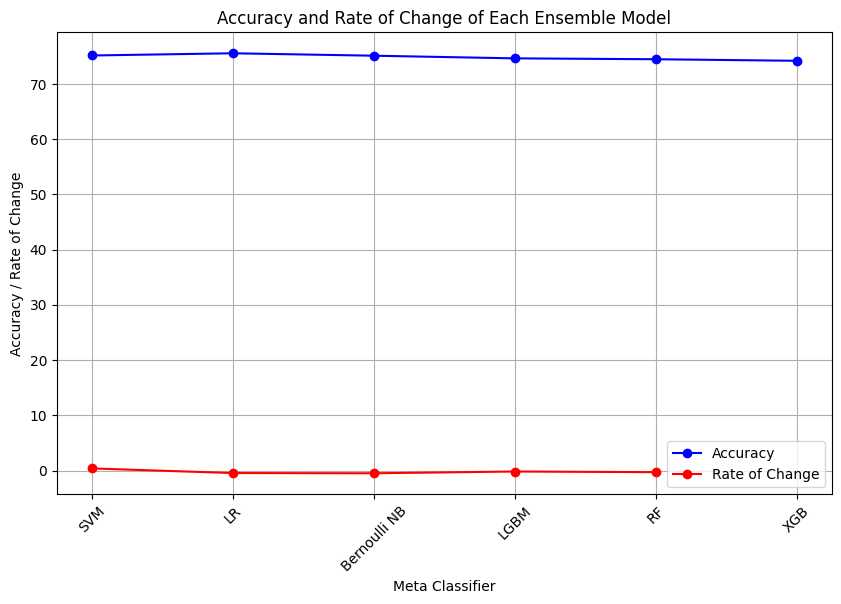

In [ ]:
import matplotlib.pyplot as plt

# Ensemble accuracies
ensemble_accuracies = [75.16, 75.56, 75.12, 74.64, 74.48, 74.2]

# Meta classifier labels
meta_classifiers = ['SVM', 'LR', 'Bernoulli NB', 'LGBM', 'RF' , 'XGB']

# Calculate rate of change in accuracy
rate_of_change = [ensemble_accuracies[i+1] - ensemble_accuracies[i] for i in range(len(ensemble_accuracies) - 1)]

# Plotting the ensemble accuracies
plt.figure(figsize=(10, 6))
plt.plot(meta_classifiers, ensemble_accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(meta_classifiers[:-1], rate_of_change, marker='o', linestyle='-', color='red', label='Rate of Change')
plt.xlabel('Meta Classifier')
plt.ylabel('Accuracy / Rate of Change')
plt.title('Accuracy and Rate of Change of Each Ensemble Model')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Best (1st) from each category  : T1,T4 (stack) with meta classifiers: T1,T2,T3,T4,T5,T6 individually

So 6 tests with the same stack (base classifiers)


1.   T1,T4 meta:T1
2.   T1,T4 meta:T2
3.   T1,T4 meta:T3
4.   T1,T4 meta:T4
5.   T1,T4 meta:T5
6.   T1,T4 meta:T6

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
base_classifiers = [
    ('lgbm', LGBMClassifier(learning_rate = 0.1, max_depth = 15, n_estimators =  200, num_leaves = 20)),
    ('svm', LinearSVC())]

sclf = StackingClassifier(estimators= base_classifiers, final_estimator = xgb.XGBClassifier())
sclf.fit(X_train,y_train)
stacked_clf = sclf.predict(X_test)

print ("Accuracy for Stacking 1 :" + str(accuracy_score(y_test, stacked_clf)))

Accuracy for Stacking 1 :0.746


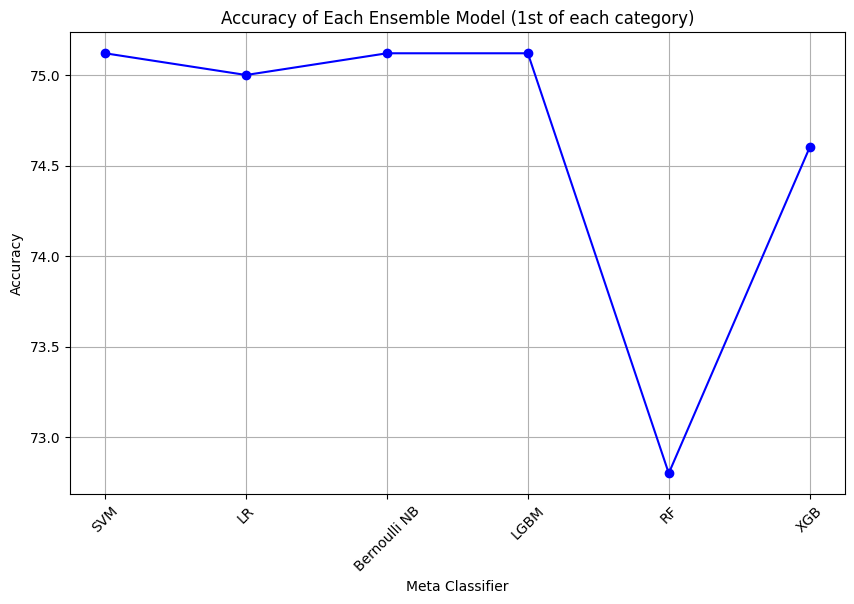

In [ ]:
import matplotlib.pyplot as plt
# Ensemble accuracies
ensemble_accuracies = [75.12, 75, 75.12, 75.12, 72.8, 74.6]

# Meta classifier labels
meta_classifiers = ['SVM', 'LR', 'Bernoulli NB', 'LGBM', 'RF' , 'XGB']

# Plotting the ensemble accuracies
plt.figure(figsize=(10, 6))
plt.plot(meta_classifiers, ensemble_accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Meta Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Ensemble Model (1st of each category)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

2nd best from each category  : T4,T5 (stack) with meta classifiers: T1,T2,T3,T4,T5,T6 individually

So 6 tests with the same stack (base classifiers)


1.   T2,T5 meta:T1
2.   T2,T5 meta:T2
3.   T2,T5 meta:T3
4.   T2,T5 meta:T4
5.   T2,T5 meta:T5
6.   T2,T5 meta:T6

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
base_classifiers = [
    ('lr', LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)),
    ('rf', RandomForestClassifier())]

sclf = StackingClassifier(estimators= base_classifiers, final_estimator = xgb.XGBClassifier())
sclf.fit(X_train,y_train)
stacked_clf = sclf.predict(X_test)

print ("Accuracy for Stacking 1 :" + str(accuracy_score(y_test, stacked_clf)))

Accuracy for Stacking 1 :0.7468


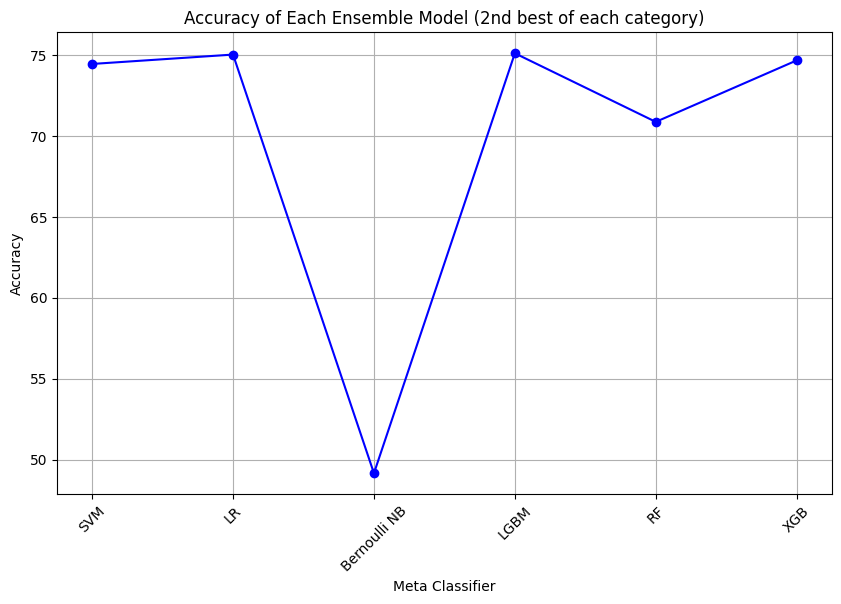

In [ ]:
import matplotlib.pyplot as plt
# Ensemble accuracies
ensemble_accuracies = [74.46, 75.04, 49.16, 75.12, 70.88, 74.68]

# Meta classifier labels
meta_classifiers = ['SVM', 'LR', 'Bernoulli NB', 'LGBM', 'RF' , 'XGB']

# Plotting the ensemble accuracies
plt.figure(figsize=(10, 6))
plt.plot(meta_classifiers, ensemble_accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Meta Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Ensemble Model (2nd best of each category)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

3rd best from each category  : T3,T6 (stack) with meta classifiers: T1,T2,T3,T4,T5,T6 individually

So 6 tests with the same stack (base classifiers)


1.   T3,T6 meta:T1
2.   T3,T6 meta:T2
3.   T3,T6 meta:T3
4.   T3,T6 meta:T4
5.   T3,T6 meta:T5
6.   T3,T6 meta:T6

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
base_classifiers = [
    ('bnb', BernoulliNB()),
    ('rf', xgb.XGBClassifier())]

sclf = StackingClassifier(estimators= base_classifiers, final_estimator = xgb.XGBClassifier())
sclf.fit(X_train,y_train)
stacked_clf = sclf.predict(X_test)

print ("Accuracy for Stacking 1 :" + str(accuracy_score(y_test, stacked_clf)))

Accuracy for Stacking 1 :0.7296


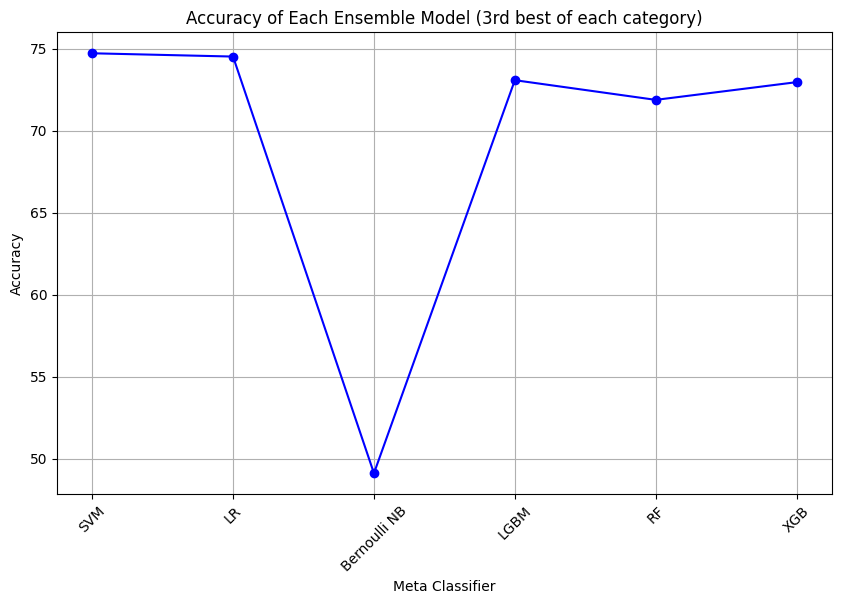

In [ ]:
import matplotlib.pyplot as plt
# Ensemble accuracies
ensemble_accuracies = [74.72, 74.52, 49.12, 73.08, 71.88, 72.96]

# Meta classifier labels
meta_classifiers = ['SVM', 'LR', 'Bernoulli NB', 'LGBM', 'RF' , 'XGB']

# Plotting the ensemble accuracies
plt.figure(figsize=(10, 6))
plt.plot(meta_classifiers, ensemble_accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Meta Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Ensemble Model (3rd best of each category)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()